#### Dickey-Fuller test
Null Hypothesis, H0, phi = 1
- p value < 0.05 (not significant), **reject** H0, dataset is stationer
- p value > 0.05 **fail to reject**, dataset is not stationer

#### Granger Causality test
Measuring **causality** between one time series and another time series, in other words whether one time series is useful in forecasting other time series. Keep in mind it is different from correlation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load a seasonal dataset
airline_df = pd.read_csv("UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline_df.index.freq = 'MS'

In [3]:
# load a nonseasonal dataset
birth_df = pd.read_csv("UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",
                       index_col='Date',
                       parse_dates=True)
birth_df.index.freq = 'D'

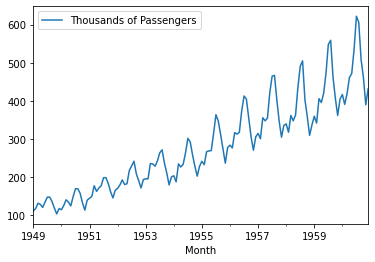

In [4]:
airline_df.plot().autoscale(axis='x', tight=True)

In [5]:
# import augmented Dickey Fuler test
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(airline_df['Thousands of Passengers'])

(0.8153688792060451,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [7]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [8]:
airline_test = adfuller(airline_df['Thousands of Passengers'])
airline_out = pd.Series(airline_test[0:4],
                        index = ['ADF Test Statistic', 'p-value',
                                'Lags Used', 'Num of Obeservations'])

In [9]:
airline_out

ADF Test Statistic        0.815369
p-value                   0.991880
Lags Used                13.000000
Num of Obeservations    130.000000
dtype: float64

In [10]:
for key, val in airline_test[4].items():
    airline_out[f'Critical Value ({key})'] = val
    
airline_out['Maximized IC'] = airline_test[5]

In [11]:
airline_out

ADF Test Statistic        0.815369
p-value                   0.991880
Lags Used                13.000000
Num of Obeservations    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
Maximized IC            996.692931
dtype: float64

In [13]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    
    out['Maximized IC'] = result[5]
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
adf_test(airline_df['Thousands of Passengers'], title='Airline Dataset')

Augmented Dickey-Fuller Test: Airline Dataset
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Maximized IC            996.692931
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
